# Part 1: Extract DATA from website

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from datetime import datetime

In [2]:
url = 'https://www.irvinespectrumcenter.com/shopping/stores?filter=all'

response = requests.get(url)

soup = BeautifulSoup(response.text)

In [3]:
rows=[]
companies = soup.find('div',{'class':'directory__listings'}).find_all('div',{'class':'directory__listings__column'})[1:]

for company in companies:
    row={}
    row['Name']      =  company['data-name']
    row['Features']  =  company['data-listing-row'].split(' ')
    row['Phone']     =  company.find('a').find('div',{'class':'directory__listing__phone'}).text
    row['Suite']     =  company['data-suite']
    row['Logo_url']  =  company.find('a').find('img')['src']
    row['Category1'] =  company.find('a')['href'].split('/')[1]
    row['Category2'] =  company.find('a')['href'].split('/')[2]
    row['Status']    =  company['data-status']
    row['Deal']      =  company['data-deals']

    rows.append(row)


In [4]:
data = pd.DataFrame(rows) # build a data frame from the list of dictionaries

pd.set_option('display.max_rows', None)

file_name = 'irvinespectrumcenter ' + datetime.now().strftime("%d-%m-%Y %H%M%S") + ".csv" # folder location with file name

data.to_csv(file_name) # save data frame as csv in file location

data # display data frame

,Name,Features,Phone,Suite,Logo_url,Category1,Category2,Status,Deal
0,85C Bakery Cafe,"[specialty-food, curbside-pickup, delivery, di...",(949) 727-0985,915,https://images.ctfassets.net/l16b5usqno44/umb-...,dining,restaurants,,False
1,adidas,"[children-s-apparel, men-s-apparel, shoes-hand...",(949) 753-0305,650,https://images.ctfassets.net/l16b5usqno44/umb-...,shopping,stores,,False
2,aerie,"[women-s-apparel, curbside-pickup, in-store-sh...",(949) 255-9186,721,https://images.ctfassets.net/l16b5usqno44/umb-...,shopping,stores,,False
3,Afters Ice Cream,"[specialty-food, delivery, dine-in, outdoor-se...",,918,https://images.ctfassets.net/l16b5usqno44/umb-...,dining,restaurants,,False
4,Alley,"[specialty-food, delivery, dine-in, outdoor-se...",(949) 932-0634,507,https://images.ctfassets.net/l16b5usqno44/umb-...,dining,restaurants,,False
5,American Eagle,"[men-s-apparel, women-s-apparel, curbside-pick...",(949) 255-9186,721,https://images.ctfassets.net/l16b5usqno44/umb-...,shopping,stores,,False
6,Anthropologie,"[accessories, beauty, books-cards-gifts, home-...",(949) 341-0104,803,https://images.ctfassets.net/l16b5usqno44/umb-...,shopping,stores,,False
7,Apple,"[electronics-home-entertainment, by-appointmen...",(949) 255-1500,930,https://images.ctfassets.net/l16b5usqno44/umb-...,shopping,stores,,False
8,ATT,"[electronics-home-entertainment, in-store-shop...",(949) 396-2393,519,https://images.ctfassets.net/l16b5usqno44/umb-...,shopping,stores,,False
9,Auntie Anne's Pretzels,"[specialty-food, curbside-pickup, delivery, di...",(949) 453-0643,737,https://images.ctfassets.net/l16b5usqno44/umb-...,dining,restaurants,,True


# Part 2: Visuals
### Questions to answer:

* How many Stores
* How many Stores by Category
* Sores amount by Suit location
* Whats the ratio Deals to Category in both categories
* which companies have deal
* which companies are newly open

In [5]:
import plotly.express as px
import plotly.graph_objects as go

In [6]:
data_removed_duplicates = data[~data.Name.duplicated()]

Stores = data_removed_duplicates.Name.count()

print(f'''
    QUESTION 1: \n
    Amount of stores: {Stores}
''')


    QUESTION 1: 

    Amount of stores: 175



In [7]:
data_Stores_by_Category = data[['Category1']].value_counts().reset_index()
data_Stores_by_Category


,Category1,0
0,shopping,118
1,dining,58


In [8]:
data.columns

Index(['Name', 'Features', 'Phone', 'Suite', 'Logo_url', 'Category1',
       'Category2', 'Status', 'Deal'],
      dtype='object')

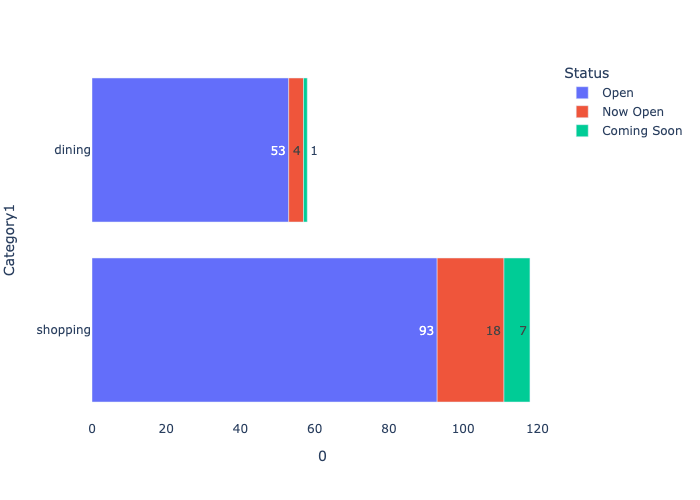

In [9]:
# Difference of restaurants and stores

data_category_Status = data[['Category1','Status']].value_counts().reset_index()

data_category_Status.Status.replace('','Open', inplace=True)

fig =px.bar(
    data_category_Status,
    orientation='h',
    y='Category1',
    x=0,
    color="Status",
    text_auto=True)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)'
# 'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})

fig.show('png')



In [10]:
data_category_Status

,Category1,Status,0
0,shopping,Open,93
1,dining,Open,53
2,shopping,Now Open,18
3,shopping,Coming Soon,7
4,dining,Now Open,4
5,dining,Coming Soon,1


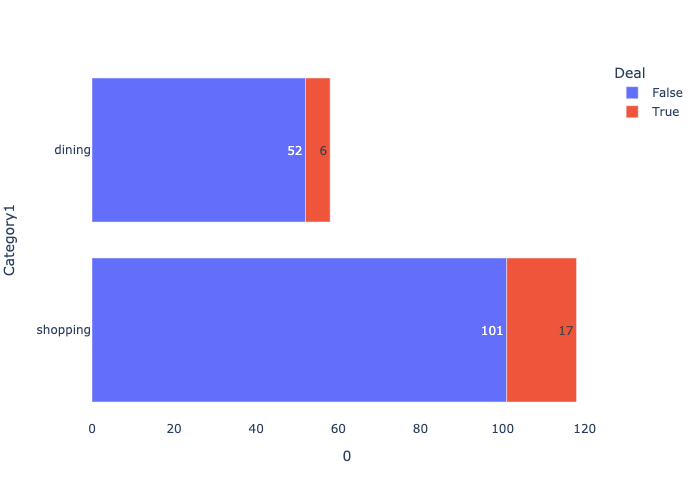

In [11]:
data_category_Status = data[['Category1','Deal']].value_counts().reset_index()

fig =px.bar(
    data_category_Status,
    orientation='h',
    y='Category1',
    x=0,
    color="Deal",
    text_auto=True)

fig.update_layout({
'plot_bgcolor': 'rgba(0, 0, 0, 0)'
# 'paper_bgcolor': 'rgba(0, 0, 0, 0)'
})

fig.show('png')

In [12]:
# Questions to answer:

# How many Stores
# How many Stores by Category
# Sores amount by Suit location
# Whats the ratio Deals to Category in both categories
# which companies have deal
# which companies are newly open

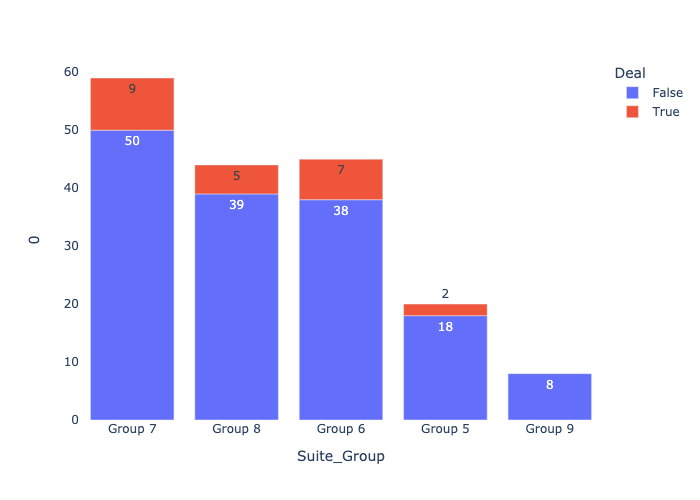

In [13]:
data['Suite_Group'] = data.Suite.apply(lambda x: 'Group '+x[0])

data_suite = data[['Suite_Group','Deal']].value_counts().reset_index()

px.bar(
    data_suite,
    y=0,
    x='Suite_Group',
    color="Deal",
    text_auto=True
).update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)'}).show('png')
